### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

### <font color='red'> Regression Task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data1: read the data for regression

In [2]:
data1= pd.read_csv("Twitter_data.csv")

check the information of data1:

In [3]:
data1.head(22)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5
5,1,0,0,1,2,3,0,1,0,0,...,1.0,0.0,1,0,0,1,2,3,0,1.0
6,1,0,0,0,2,0,2,1,0,0,...,0.0,1.0,1,0,0,0,2,0,2,0.0
7,0,2,0,0,0,1,1,0,2,0,...,1.0,1.0,0,2,0,0,0,1,1,2.0
8,2,0,0,0,1,1,2,2,0,0,...,1.0,1.0,2,0,0,0,1,1,2,1.0
9,0,1,1,2,2,0,3,0,1,1,...,0.0,1.0,0,1,1,2,2,0,3,0.5


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
0     583250 non-null int64
1     583250 non-null int64
2     583250 non-null int64
3     583250 non-null int64
4     583250 non-null int64
5     583250 non-null int64
6     583250 non-null int64
7     583250 non-null int64
8     583250 non-null int64
9     583250 non-null int64
10    583250 non-null int64
11    583250 non-null int64
12    583250 non-null int64
13    583250 non-null int64
14    583250 non-null float64
15    583250 non-null float64
16    583250 non-null float64
17    583250 non-null float64
18    583250 non-null float64
19    583250 non-null float64
20    583250 non-null float64
21    583250 non-null float64
22    583250 non-null float64
23    583250 non-null float64
24    583250 non-null float64
25    583250 non-null float64
26    583250 non-null float64
27    583250 non-null float64
28    583250 non-null int64
29    583250 non-null int64
30    583250 non-null

In [5]:
data1.dtypes[0:5]

0    int64
1    int64
2    int64
3    int64
4    int64
dtype: object

In [6]:
data1.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,...,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000,583250.000000
mean,140.339640,136.770147,159.679271,181.592091,201.097445,220.175371,219.388214,71.038051,69.829631,82.198203,...,1.136688,1.140372,140.789860,137.181270,160.105922,182.057440,201.596482,220.705900,219.936864,191.279493
std,431.772639,432.305129,502.057428,574.883713,630.448432,669.205930,672.182204,196.876718,202.199758,239.523042,...,1.432327,1.552313,432.624954,433.026611,502.774408,575.658022,631.258318,670.050977,673.032541,612.352354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,4.500000
50%,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,30.000000,11.000000,11.000000,13.000000,...,1.000000,1.000000,18.000000,17.000000,21.000000,24.000000,27.000000,31.000000,31.000000,25.500000
75%,104.000000,100.000000,115.000000,131.000000,147.000000,166.000000,164.000000,59.000000,57.000000,65.000000,...,1.090909,1.091296,104.000000,101.000000,115.000000,131.000000,148.000000,167.000000,165.000000,139.000000
max,24210.000000,29574.000000,37505.000000,72366.000000,79079.000000,79079.000000,79079.000000,18654.000000,22035.000000,29402.000000,...,262.000000,295.000000,24301.000000,29574.000000,37505.000000,72366.000000,79083.000000,79083.000000,79083.000000,75724.500000


## common data information for rest of regressions

In [7]:
X=data1.iloc[:,0:77]
y=np.array(data1.iloc[:,77])

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y)

numpy.ndarray

sampling

In [10]:
from sklearn.model_selection import train_test_split

x_sample,sample_data,y_sample,sample_target = train_test_split(X, y, shuffle = True, test_size = 0.1)

In [11]:
sample_target

array([  1.5, 451.5,  29.5, ...,   1.5,   1.5,  35. ])

In [12]:
len(sample_target)

58325

In [13]:
sample_data

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
239124,3,1,1,5,19,9,4,1,2,1,...,2.473684,4.300000,1.000000,4,1,1,6,19,10,4
77480,123,50,66,21,33,125,111,41,27,23,...,1.823529,1.157480,1.054054,126,52,67,23,34,127,111
37069,15,6,0,24,12,16,16,13,3,0,...,1.000000,1.058824,1.062500,15,6,0,24,12,17,16
353416,1,1,1,2,4,7,7,1,1,1,...,1.000000,1.000000,1.000000,1,1,1,2,4,7,7
240437,481,238,230,526,477,400,484,188,104,102,...,1.207469,1.107232,1.703093,482,243,232,528,482,401,485
420444,0,1,1,0,1,1,1,0,1,1,...,1.000000,1.000000,1.000000,0,1,1,0,1,1,1
7467,329,180,722,1242,1100,1530,1311,137,65,269,...,1.008182,1.019595,1.047872,331,182,722,1254,1100,1531,1316
569155,9,24,34,28,15,27,44,6,15,19,...,1.000000,1.000000,1.000000,9,24,34,28,15,27,44
422497,32,25,29,43,34,46,45,14,15,16,...,1.147059,1.217391,1.088889,32,25,29,43,34,46,45
91241,493,679,566,987,1193,905,846,377,549,430,...,1.000000,1.000000,1.000000,493,679,566,987,1193,905,846


In [14]:
from sklearn.preprocessing import MinMaxScaler #standarized
from sklearn.model_selection import train_test_split #validation

X_train_org, X_test_org, y_train, y_test = train_test_split(sample_data,sample_target, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org) #原本data frame變成array
X_test = scaler.transform(X_test_org)

## Knn regression:

plot:

KeyboardInterrupt: 

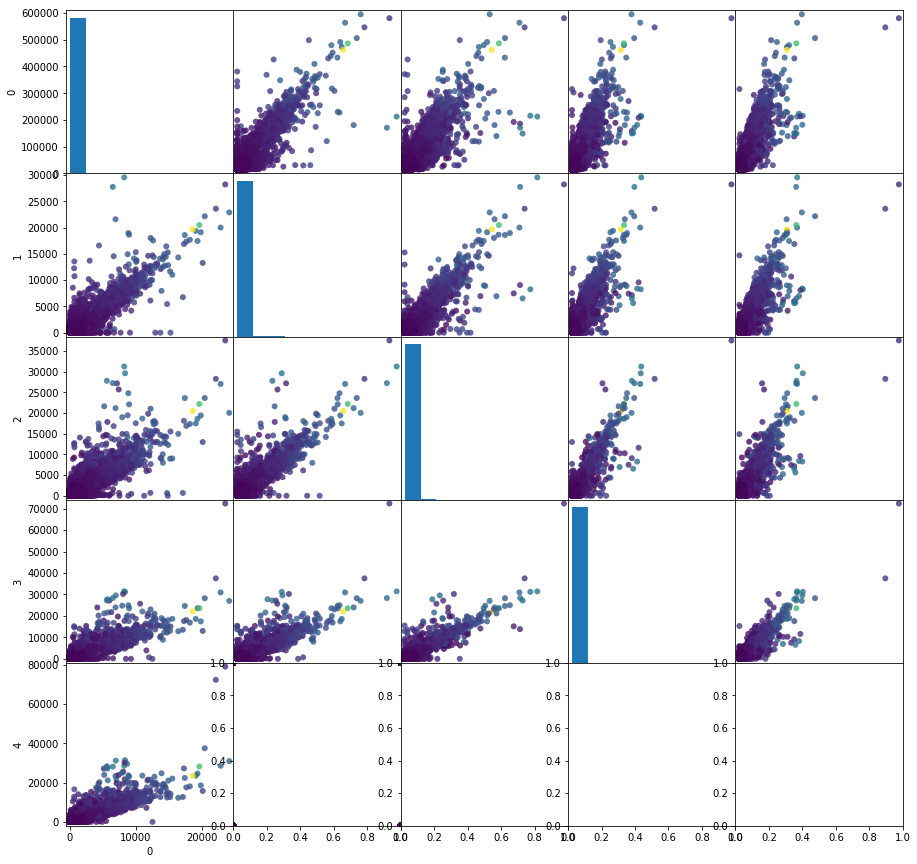

In [16]:
%matplotlib inline
from pandas.plotting import scatter_matrix

attributes = data1.columns[:5]
scatter_matrix(X[attributes], figsize = (15,15), c = y, alpha = 0.8, marker = 'O')

###### KNN regression with  grid search and cv = 5: 

In [18]:
#knnx and knny have done the standarize already. 

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor()
param_grid = {'n_neighbors':[1,5,10,15,20,25,30]}

grid_knnr = GridSearchCV(knnr, param_grid=param_grid, cv = 5)
grid_knnr.fit(X_train, y_train) 
grid_knnr.score(X_train, y_train)

0.9465857253266793

In [20]:
grid_knnr.score(X_test, y_test)

0.9324830554649436

In [21]:
grid_knnr.best_params_

{'n_neighbors': 5}

In [22]:
grid_knnr.cv_results_['mean_test_score'] # 10 n neighbors

array([0.8842733 , 0.90717178, 0.8990146 , 0.88992825, 0.88274548,
       0.87718697, 0.87214262])

The best K in Knn regression with cv= 5 is 5

coeficient of KNN regression

In [24]:
knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [25]:
knn_reg.coef_

AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

In [26]:
knn_reg.intercept_

AttributeError: 'KNeighborsRegressor' object has no attribute 'intercept_'

report

In [93]:
report_table=[]
report_table = report_table + [['KnnR', 'n=5,cv=5', grid_knnr.score(X_train, y_train), grid_knnr.score(X_test, y_test)]]

## Polynomial regression

visualization for the No.5 variable

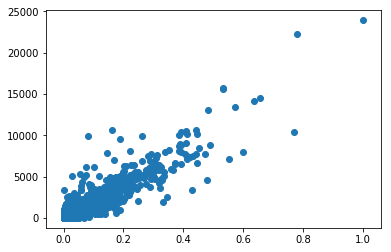

In [30]:
from  sklearn.preprocessing  import PolynomialFeatures

X_train_1 = X_train[:,5].reshape(-1,1)
plt.scatter(X_train_1,y_train)

##### the grid search with cv=5 for polynomial regression

pipeline method

In [76]:
from sklearn.model_selection import GridSearchCV
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
poly = PolynomialFeatures()

In [77]:
from sklearn.pipeline import Pipeline

pipe_poly = Pipeline([('poly',PolynomialFeatures()), ('lreg', LinearRegression())])

In [78]:
pipe_poly.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [79]:
param_grid = {'poly__degree': [1,2]}

In [80]:
grid_poly = GridSearchCV(pipe_poly, param_grid=param_grid, cv=5)

grid_poly.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid_poly.best_score_))
print("Test set score: {:.2f}".format(grid_poly.score(X_test, y_test)))
print("Best parameters: {}".format(grid_poly.best_params_))

Best cross-validation accuracy: 0.94
Test set score: 0.95
Best parameters: {'poly__degree': 1}


coefficicent of Polynominal 

In [81]:
poly = PolynomialFeatures(1)

In [82]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
lreg.coef_

array([ 2.34270011e-11,  9.46866829e+03, -4.04864037e+03,  7.09335564e+04,
        4.09147935e+04, -1.33696217e+04,  4.99136397e+04, -2.76613177e+02,
       -4.77187759e+02, -2.34546117e+03,  1.59733874e+02,  1.86126697e+03,
        7.74101603e+02, -8.03249906e+01,  3.72824709e+03,  3.66346563e+03,
        3.74227267e+02,  1.80878936e+03, -9.95438779e+02,  8.23291050e+03,
        9.35160650e+02, -5.22567444e+03, -9.34172308e+00, -7.56679655e-02,
       -1.88829204e+01, -6.55298594e+00, -1.75695055e+00, -4.81790337e+00,
       -7.73215893e+00,  4.55344469e+03, -1.41890443e+03,  7.93260530e+03,
       -3.55584121e+03,  8.03194251e+03, -7.67272436e+03,  6.62553362e+03,
       -1.62661014e+03,  1.06503045e+03, -7.06954445e+02,  1.09566862e+03,
       -7.21155814e+03,  1.17655143e+03, -1.92604079e+03,  8.58103425e+00,
       -6.89948421e+00,  1.75028486e+01,  1.00749169e+01,  5.57360269e+00,
        7.32495227e+00,  8.01848296e+00,  1.77466215e+02, -7.92456319e+01,
        2.97749230e+02,  

In [84]:
lreg.intercept_

0.5116780899353159

report

In [94]:
report_table = report_table + [['PolyR', 'degree=1', grid_poly.score(X_train, y_train), grid_poly.score(X_test, y_test)]]

## Linear regression using the Normal Equation

linear regression train and test scores

In [96]:
from sklearn.linear_model import LinearRegression #linear regression

lreg = LinearRegression() 
lreg.fit(X_train, y_train) 
lreg.score(X_test, y_test)

0.9468887141832165

In [37]:
lreg.coef_

array([ 9.46866829e+03, -4.04864037e+03,  7.09335564e+04,  4.09147935e+04,
       -1.33696217e+04,  4.99136397e+04, -2.76613177e+02, -4.77187759e+02,
       -2.34546117e+03,  1.59733874e+02,  1.86126697e+03,  7.74101603e+02,
       -8.03249906e+01,  3.72824709e+03,  3.66346563e+03,  3.74227267e+02,
        1.80878936e+03, -9.95438779e+02,  8.23291050e+03,  9.35160650e+02,
       -5.22567444e+03, -9.34172308e+00, -7.56679655e-02, -1.88829204e+01,
       -6.55298594e+00, -1.75695055e+00, -4.81790337e+00, -7.73215893e+00,
        4.55344469e+03, -1.41890443e+03,  7.93260530e+03, -3.55584121e+03,
        8.03194251e+03, -7.67272436e+03,  6.62553362e+03, -1.62661014e+03,
        1.06503045e+03, -7.06954445e+02,  1.09566862e+03, -7.21155814e+03,
        1.17655143e+03, -1.92604079e+03,  8.58103425e+00, -6.89948421e+00,
        1.75028486e+01,  1.00749169e+01,  5.57360269e+00,  7.32495227e+00,
        8.01848296e+00,  1.77466215e+02, -7.92456319e+01,  2.97749230e+02,
        1.11190757e+01,  

In [38]:
lreg.intercept_

0.5116780900882247

linear_visualization

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,5].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm) #predict from the 0:5 cols dataset

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('RM')

report

In [97]:
report_table = report_table + [['LinR', 'None', lreg.score(X_train, y_train),lreg.score(X_test, y_test)]]

## Ridge

Ridge train and test scores with best alpha

##### Ridge regression with grid search and cv = 5:

In [40]:
#we did the scalar for X test and X test before so that we don't have to put the scalar into param_grid again

from sklearn.model_selection import GridSearchCV
from  sklearn.linear_model import Ridge

ridge2 = Ridge()
param_grid = {'alpha': [0.001,0.01, 0.1, 1, 10, 100]}

grid_ridge2 = GridSearchCV(ridge2, param_grid=param_grid, cv = 5)
grid_ridge2.fit(X_train, y_train)
grid_ridge2.score(X_train, y_train)

0.9513054901610167

In [41]:
grid_ridge2.score(X_test, y_test)

0.9467566327491803

In [42]:
grid_ridge2.best_params_

{'alpha': 0.1}

best α parameter is 0.1

In [49]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Ridge coefficient

In [50]:
ridge.intercept_

0.9229065903011815

In [51]:
ridge.coef_

array([ 3.51795631e+02,  1.40376377e+03,  1.30416157e+03,  6.70856477e+02,
        6.28463899e+02,  1.00186238e+03,  6.55446241e+03, -6.16894771e+02,
       -1.49394168e+03, -5.43503145e+02,  2.07512977e+03,  9.49326851e+02,
        5.10773724e+02,  2.68095663e+03,  2.61612707e+03,  1.44142463e+03,
        7.07317681e+02,  4.97634176e+02,  1.06669456e+03,  2.41991050e+03,
       -5.16144065e+03,  3.47603974e-01,  2.16210430e+00,  7.74340537e+00,
        9.82205196e+00,  4.51604148e+00,  8.13069466e+00, -3.61255210e+00,
        6.25349193e+02,  4.79764741e+02,  1.75820801e+03, -1.40769965e+02,
        2.80407186e+02, -9.36592645e+02,  4.98670101e+03, -5.80591297e+02,
       -1.51535054e+00,  3.17585221e+02, -3.31909188e+02, -6.17580080e+02,
       -5.11904563e+02, -1.66202978e+03, -1.09068703e+00, -8.88925747e+00,
       -9.54919196e+00, -6.58371457e+00, -8.83274877e-01, -5.70330056e+00,
        3.65964246e+00,  3.27684425e+01, -2.80332439e+01,  1.68127886e+02,
        1.81950152e+01,  

In [52]:
grid_ridge2.cv_results_['mean_test_score'] # 6 alpha MSE

array([0.94396934, 0.94593333, 0.94712815, 0.94364208, 0.92273192,
       0.87727216])

In [53]:
print('Train score: {:.4f}'.format(grid_ridge2.score(X_train,y_train)))
print('Test score: {:.4f}'.format(grid_ridge2.score(X_test, y_test)))

Train score: 0.9513
Test score: 0.9468


Testing score: 0.9468

Ridge visualization with alpha and coefficients

In [ ]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2) #和在一起
coeff = []

for alpha in x_range: #抓值
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
#print(coeff)    
coeff = np.array(coeff) #coefficient of all variables#we can transfer list into array directly

#plot 

for i in range(0,77):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i)) #13 cols#matrix取法

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True) #box調整
plt.show()

#coefficient在抹個alfa直開示收斂

report

In [98]:
report_table = report_table + [['Ridge', 'alpha=0.1,cv=5', grid_ridge2.score(X_train, y_train), grid_ridge2.score(X_test, y_test)]]

## lasso

lasso train and test scores

##### lasso regression with grid search and cv = 5:

In [55]:
#we did the scalar for X test and X test before so that we don't have to put the scalar into param_grid again

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso2 = Lasso()
param_grid = {'alpha': [0.0001,0.001,0.01, 0.1, 1, 10, 100]}

grid_lasso2 = GridSearchCV(lasso2, param_grid=param_grid, cv = 5)
grid_lasso2.fit(X_train, y_train)
grid_lasso2.score(X_train, y_train)

C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

0.9510771447161555

In [56]:
grid_lasso2.score(X_test, y_test)

0.9472705479177146

In [57]:
grid_lasso2.best_params_

{'alpha': 0.01}

The best alpha is suggested to be 0.01

coefficient of lasso

In [63]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha = 0.01)
Lasso.fit(X_train,y_train)

C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
Lasso.coef_

array([ 0.00000000e+00,  9.48258913e+02,  3.33008100e+03,  1.09730477e+02,
        9.73227646e+02,  2.52506338e+02,  1.53380319e+04, -6.22857701e+00,
       -1.44955777e+03, -0.00000000e+00,  1.78803338e+03,  4.55939891e+02,
        5.11836142e+02,  1.99153613e+03,  2.04542290e+03,  1.33855195e+03,
        1.09109018e+03,  1.23634603e+02,  0.00000000e+00,  2.05480324e+03,
       -5.12085951e+03, -0.00000000e+00,  0.00000000e+00,  1.88321262e-02,
        2.96266188e+00,  3.71943154e+00,  2.22128044e+00,  0.00000000e+00,
        3.83042506e+02,  1.48928901e+03,  1.75487441e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.04854495e+03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.70259979e+03, -5.68319766e-01, -6.72720979e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [65]:
Lasso.intercept_

0.7027378704975433

In [66]:
grid_lasso2.cv_results_['mean_test_score'] # 6 alpha MSE

array([ 9.46022647e-01,  9.46228022e-01,  9.46820064e-01,  9.41793325e-01,
        9.22246751e-01,  5.45740317e-01, -1.36638936e-04])

In [67]:
print('Train score: {:.4f}'.format(grid_lasso2.score(X_train,y_train)))
print('Test score: {:.4f}'.format(grid_lasso2.score(X_test, y_test)))

Train score: 0.9511
Test score: 0.9473


The testing score is 0.9473

lasso visualization for best alpha with coeffcients for each variable

In [ ]:
from sklearn.linear_model import Lasso
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

#alpha直接抓直--> 非index(location)
for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,77):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show() #how many features what alfa chooses

report

In [99]:
report_table = report_table + [['Lasso', 'alpha=0.01,cv=5', grid_lasso2.score(X_train, y_train), grid_lasso2.score(X_test, y_test)]]

## <font color='red'> Summary: 

report

In [100]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy'])

In [101]:
report.index = report['Model name']

In [102]:
report

,Model name,Model parameter,Train accuracy,Test accuracy
Model name,,,,
KnnR,KnnR,"n=5,cv=5",0.946586,0.932483
PolyR,PolyR,degree=1,0.951932,0.946889
LinR,LinR,None,0.951932,0.946889
Ridge,Ridge,"alpha=0.1,cv=5",0.951305,0.946757
Lasso,Lasso,"alpha=0.01,cv=5",0.951077,0.947271


### 1. First, we need to decide the data1 is suitable linear regression or Polynomial regression:

##### We found that when we do the test score for Polynomial regression, degree =1 will lead the best testing score(0.946889),
##### As a result, we decide to use linear regression instead of Polynomial regression

### 2. Second, using linear tesing score compares with KNN regression(CV=5) to find out which regression is better:

##### We can see that the test score of linear is 0.946889 and the test score of knn regression is 0.932483(n neighbors = 5, cv = 5)

##### In here, we can find that the KNN regression with n=5 and cv=5 is not better than linear regression.


### 3. Third, we compare Linear regression with Ridge regression(CV=5) to see which one regression is better by testing score :

##### We can realize that the test score of linear regression is 0.946889 and the test score of ridge regression is 0.946757 (alpha is  1,cv = 5)

##### Therefore, we choose linear regression instead of Ridge regression

### 4. Forth, we wonder lasso regression(CV=5) is more suitable for dataset or linear regression: 

##### We can find that he test score of linear regression is 0.946889 and the test score of lasso regression is he test score of ridge regression is 0.947271 (alpha is 0.01,cv=5)

##### As a result, the lasso regression is more suitable for data1 than Knn regression. 

##### <font color='red'> The final result we found is that Lasso regression is the best regression for data1.

##### <font color='red'> In the regression part, we cannot compare SVM with other regressions because the SVM is for classification margin and constraint

## The best model to run the whole dataset

In [103]:
dataf= pd.read_csv("Twitter_data.csv")

In [104]:
XX=dataf.iloc[:,0:77]
yy=np.array(dataf.iloc[:,77])

In [106]:
from sklearn.preprocessing import MinMaxScaler #standarized
from sklearn.model_selection import train_test_split #validation

X_train_o, X_test_o, y_traint, y_testt = train_test_split(XX,yy, random_state = 0)

scaler = MinMaxScaler()
X_trainf = scaler.fit_transform(X_train_o) #原本data frame變成array
X_testf = scaler.transform(X_test_o)

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lassof = Lasso(alpha=0.01)
lassof.fit(X_trainf,y_traint)

C:\Users\Billy Chen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
lassof.score(X_trainf,y_traint)

0.9308746821698786

In [115]:
lassof.score(X_testf,y_testt)

0.9428293375313618

The lasso's testing score is 0.9428 for whole dataset